In [106]:
import numpy as np
import pandas as pd
%matplotlib inline
import random
from pprint import pprint
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
import timeit
import matplotlib.pyplot as plt
from dtreefunctions import decision_tree_algorithm,decision_tree_predictions,train_test_split
from randomforestfunctions import random_forest_algorithm,random_forest_predictions
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


In [107]:
df = pd.read_csv("breast-cancer.csv",skipinitialspace=True)
df["label"] = df.Class
df = df.drop("Class", axis=1)

df=df.replace('no-recurrence-events', 0)
df=df.replace('recurrence-events', 1)

column_names = []
for column in df.columns:
    name = column.replace("-", "_")
    column_names.append(name)
df.columns = column_names


In [108]:
random.seed(0)
train_df, test_df = train_test_split(df, test_size=0.2)

In [109]:
forest = random_forest_algorithm(train_df, n_trees=70, n_bootstrap=50, n_features=5, dt_max_depth=10)
y_pred_rf = random_forest_predictions(test_df, forest)
print("RF",classification_report(y_pred_rf, test_df.label))
print("RF",accuracy_score(y_pred_rf, test_df.label))
print("RF",confusion_matrix(y_pred_rf, test_df.label))


dtree = decision_tree_algorithm(train_df, max_depth=4)
y_pred_dt = decision_tree_predictions(test_df,dtree)
print("DT",classification_report(y_pred_dt, test_df.label))
print("DT",accuracy_score(y_pred_dt, test_df.label))
print("DT",confusion_matrix(y_pred_dt, test_df.label))

RF               precision    recall  f1-score   support

           0       0.89      0.71      0.79        48
           1       0.26      0.56      0.36         9

    accuracy                           0.68        57
   macro avg       0.58      0.63      0.57        57
weighted avg       0.80      0.68      0.72        57

RF 0.6842105263157895
RF [[34 14]
 [ 4  5]]
DT               precision    recall  f1-score   support

           0       0.92      0.76      0.83        46
           1       0.42      0.73      0.53        11

    accuracy                           0.75        57
   macro avg       0.67      0.74      0.68        57
weighted avg       0.82      0.75      0.78        57

DT 0.7543859649122807
DT [[35 11]
 [ 3  8]]


In [79]:
i=0
while i<10:
    forest = random_forest_algorithm(train_df, n_trees=70, n_bootstrap=50, n_features=8, dt_max_depth=10)
    y_pred_rf = random_forest_predictions(test_df, forest)
    print("RF",accuracy_score(y_pred_rf, test_df.label))
    dtree = decision_tree_algorithm(train_df, max_depth=4)
    y_pred_dt = decision_tree_predictions(test_df,dtree)
    print("DT",accuracy_score(y_pred_dt, test_df.label))
    i = i+1

RF 0.7192982456140351
DT 0.7543859649122807
RF 0.7368421052631579
DT 0.7543859649122807
RF 0.7017543859649122
DT 0.7543859649122807
RF 0.6842105263157895
DT 0.7543859649122807
RF 0.7192982456140351
DT 0.7543859649122807
RF 0.7192982456140351
DT 0.7543859649122807
RF 0.7017543859649122
DT 0.7543859649122807
RF 0.7192982456140351
DT 0.7543859649122807
RF 0.6842105263157895
DT 0.7543859649122807
RF 0.7192982456140351
DT 0.7543859649122807


In [93]:
y_test = test_df.iloc[:,-1]

In [98]:
dtree_auc = roc_auc_score(y_test, y_pred_dt)
dtree_fpr, dtree_tpr, _ = roc_curve(y_test, y_pred_dt)


rf_auc = roc_auc_score(y_test, y_pred_rf)
rf_fpr, rf_tpr, _ = roc_curve(y_test, y_pred_rf)


0.6315789473684211

In [99]:
print(rf_fpr, rf_tpr)

[0.         0.05263158 1.        ] [0.         0.31578947 1.        ]


In [95]:
confusion_matrix(y_test, y_pred_dt)

array([[35,  3],
       [11,  8]])

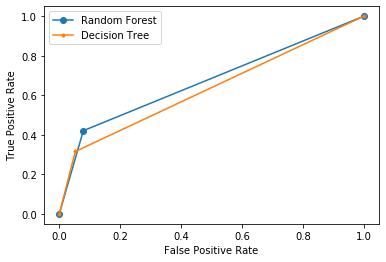

In [96]:
# plot the roc curve for the model
plt.plot(dtree_fpr, dtree_tpr, marker='o', label='Random Forest')
plt.plot(rf_fpr, rf_tpr, marker='.', label='Decision Tree')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()